In [1]:
# Instalação da biblioteca spaCy
!pip install -U spacy==3.* -q


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Atualização da biblioteca Pillow para gerar o Word Cloud
!pip install --upgrade Pillow

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Versão spaCy
!python -m spacy info

C:\Program Files\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.2.0)/charset_normalizer (2.0.4) doesn't match a supported version!



============================== Info about spaCy ==============================

spaCy version    3.7.4                         
Location         C:\Users\raphaella220046\AppData\Roaming\Python\Python39\site-packages\spacy
Platform         Windows-10-10.0.19042-SP0     
Python version   3.9.7                         
Pipelines        en_core_web_sm (3.7.1)        



  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [4]:
# Baixa o modelo de linguagem em inglês
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable

C:\Program Files\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.2.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


     --------------------------------------- 12.8/12.8 MB 34.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')




[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Importação das bibliotecas
import os
import spacy
import pandas as pd
import numpy as np
from openpyxl import workbook
from openpyxl import load_workbook
import re
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict

C:\Program Files\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.2.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [6]:
# Baixa o modelo de linguagem em inglês
nlp = spacy.load('en_core_web_sm')
type(nlp)

spacy.lang.en.English

In [7]:
# Defina o diretório onde estão localizados os arquivos .xls
diretorio = 'xls_files/'

# Liste todos os arquivos no diretório
arquivos = os.listdir(diretorio)

# Verifique se já existem arquivos com a extensão .xlsx na pasta
if any(arquivo.endswith('.xlsx') for arquivo in arquivos):
    print("Já existem arquivos com a extensão .xlsx na pasta")
else:
    # Itere sobre cada arquivo
    for arquivo in arquivos:
        # Verifique se o arquivo é um arquivo .xls
        if arquivo.endswith('.xls'):
            # Carregue o arquivo .xls em um DataFrame usando o pandas
            df = pd.read_excel(os.path.join(diretorio, arquivo))

            # Defina o caminho para salvar o arquivo .xlsx com o mesmo nome, mas extensão .xlsx
            novo_nome = os.path.splitext(arquivo)[0] + '.xlsx'
            novo_caminho = os.path.join(diretorio, novo_nome)

            # Salve o DataFrame como um arquivo .xlsx
            df.to_excel(novo_caminho, index=False)

            print(f'O arquivo {arquivo} foi convertido para {novo_nome}')

Já existem arquivos com a extensão .xlsx na pasta


In [8]:
# Caminho dos arquivos .xls
path = "xls_files"
# Lista de todos os arquivos que há no diretório
files = os.listdir(path)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
print(files_xlsx)

['Perovskite and band gap 1-1000.xlsx', 'Perovskite and band gap 1001-2000.xlsx', 'Perovskite and band gap 2001-3000.xlsx', 'Perovskite and band gap 3001-4000.xlsx', 'Perovskite and band gap 4001-4796.xlsx', 'Perovskite and band gap.xlsx']


In [9]:
# Lista dos arquivos em .xlsx
df_list = []

# Compilação dos arquivos
for f in files_xlsx:
    data = pd.read_excel(os.path.join(path, f))
    df_list.append(data)
df = pd.concat(df_list)

In [10]:
# Verifica se já existe o arquivo na pasta para não sobrescrevê-lo, evitando duplicar os dados
if "Perovskite and band gap.xlsx" in files_xlsx:
    print("Já existe o arquivo na pasta")
else:
    output_path = "xls_files/Perovskite and band gap.xlsx"
    df.to_excel(output_path, index=False)

Já existe o arquivo na pasta


In [11]:
# Leitura do arquivo e exclusão de dados faltantes (NAN)
df_perovskite = pd.read_excel("xls_files/Perovskite and band gap.xlsx")
df_perovskite = df_perovskite.dropna(axis = 1, how = 'all')
#print(df_perovskite)

In [12]:
# Converte os abstracts no formato string
df_perovskite['Abstract'] = df_perovskite['Abstract'].astype("string")
print(df_perovskite['Abstract'])

0       Lead-free double-perovskite nanocrystals (NCs)...
1       Perovskite solar cells (PSCs) have attracted u...
2       Perovskite-based double junction tandem solar ...
3       Halide double perovskite has emerged as a nove...
4       The desired morphology, narrowed band gap and ...
                              ...                        
4791    Recently, antimony selenide (Sb2Se3) has been ...
4792    Compared with the first-generation semiconduct...
4793    Semiconductor quantum dots (QDs) are nanocryst...
4794    This review highlights the development of ener...
4795    All-inorganic perovskite quantum dots have att...
Name: Abstract, Length: 4796, dtype: string


In [13]:
# Busca pelo termo na sentença
termo = 'band gap'

# Define o limite da busca, unidade de medida
palavra = "eV" or "electron volt"

# Define o intervalo do dataframe a ser processado
inicio = 0
fim = len(df_perovskite['Abstract'])

# Lista para armazenar os valores de nomes de perovskitas e seus respectivos band gaps
bg = []
prvskt = []

# Loop para iterar sobre o dataframe e encontrar os dados, de acordo com os critérios em RegEx
for abstract in df_perovskite['Abstract'][inicio:fim]:
    sentenca = nlp(abstract)
    abstract = []
    band_gap = []
    for sent in sentenca.sents:
        abstract.append(sent)
        if termo in str(sent):
            matches = re.findall(r'(\d+\.\d+?)\s*' + re.escape(palavra), str(sent))
            band_gap.append(matches)
            for eV in band_gap:
                for token in sent:
                    if str(token) in eV:
                        match = re.findall(r'\b(?:[A-Z][a-z][A-Z]|[A-Z][A-Z]\d|[A-Z][a-z]\d|[A-Z]\d[A-Z]|[A-Z]{3}\d)\w{3,}\b', ' '.join(str(token) for token in sent))
                        #print(eV, match)
                        bg.append(eV)
                        prvskt.append(match)
                        
print(len(bg))
print(len(prvskt))

2340
2340


In [14]:
# Lista para armazenar valores individuais de band gap e perovskitas
band_gap = []
perovskite = []

# Loop para identificar se as listas de perovskitas e band gaps contêm valor unitário e armazenar em nova lista
for eV, item in zip(bg, prvskt):
    if len(eV) == 1 and len(item) == 1:
        band_gap.append(eV)
        perovskite.append(item)
        #print(band_gap, perovskite)
        PEROVSKITE = [item[0] for item in perovskite]
        BAND_GAP = [eV[0] for eV in band_gap]
        tupla = list(zip(PEROVSKITE, BAND_GAP))
        df = pd.DataFrame(tupla, columns=['Perovskite', 'Band gap (eV)'])
        df.to_csv('Perovskite_bg.csv', sep=',', index=False, encoding='utf-8')
        #print(df)

print(band_gap)
print()
print(perovskite)

[['0.48'], ['1.341'], ['1.51'], ['1.8'], ['1.7'], ['1.7'], ['3.46'], ['1.94'], ['0.3'], ['1.33'], ['1.64'], ['3.4'], ['1.43'], ['1.75'], ['1.37'], ['2.29'], ['1.5'], ['3.77'], ['2.07'], ['3.77'], ['2.07'], ['2.8'], ['4.05'], ['1.65'], ['1.24'], ['2.3'], ['1.1'], ['2.06'], ['1.10'], ['1.36'], ['14.00'], ['3.14'], ['1.36'], ['2.0'], ['1.257'], ['2.36'], ['1.5'], ['1.5'], ['2.109'], ['1.91'], ['1.61'], ['1.95'], ['1.762'], ['2.62'], ['3.0'], ['2.63'], ['1.37'], ['3.50'], ['2.95'], ['0.1'], ['1.86'], ['1.8'], ['3.4'], ['1.70'], ['3.25'], ['4.25'], ['0.48'], ['1.3'], ['2.44'], ['2.30'], ['1.63'], ['2.15'], ['2.8'], ['1.762'], ['1.47'], ['2.3'], ['1.3'], ['2.1'], ['2.3'], ['2.428'], ['2.12'], ['1.83'], ['2.33'], ['3.87'], ['3.6'], ['1.95'], ['3.92'], ['1.55'], ['1.77'], ['1.6'], ['1.73'], ['0.02'], ['0.689'], ['2.6'], ['1.75'], ['2.0'], ['1.59'], ['2.85'], ['2.8'], ['2.07'], ['1.67'], ['0.69'], ['2.56'], ['2.71'], ['3.15'], ['1.8'], ['1.37'], ['4.02'], ['0.86'], ['1.98'], ['1.72'], ['1.339']

In [15]:
# Conjunto para rastrear valores únicos de perovskitas
valores_unicos = set()

# Listas para armazenar os valores filtrados
novo_band_gap = []
novo_perovskite = []

# Loop sobre as listas band_gap e perovskite para obter apenas valores únicos
for eV, item in zip(band_gap, perovskite):
    PEROVSKITE = [item[0] for item in perovskite]
    BAND_GAP = [eV[0] for eV in band_gap]
    # Critério de verificação para remover valores repetidos e que não contém um número
    for eV, item in zip(BAND_GAP, PEROVSKITE):
        if item not in valores_unicos and any(char.isdigit() and float(eV)<10 for char in item):
            # Adiciona o item ao conjunto de valores únicos
            valores_unicos.add(item)
            # Adiciona os valores filtrados às novas listas
            novo_band_gap.append(eV)
            novo_perovskite.append(item)

# Cria um DataFrame com os valores filtrados
df = pd.DataFrame({'Perovskite': novo_perovskite, 'Band gap (eV)': novo_band_gap})

# Salva o DataFrame em um arquivo CSV
df.to_csv('Perovskite_bg_tratado.csv', sep=',', index=False, encoding='utf-8')

In [16]:
# Busca de termo nos abstracts

valor = 'BiMnO3' #'CH3NH3PbI3' #'C5N2H9' #'BaLa4Ti4O' #'PbBi2Nb2'

coluna = 'Abstract'

for resumo in df_perovskite[coluna][inicio:fim]:
    if valor in resumo:
        print(resumo)

We have developed the means to grow BiMnO3 thin films with unparalleled structural perfection by reactive molecular-beam epitaxy and determined its band gap. Film growth occurs in an adsorption-controlled growth regime. Within this growth window bounded by oxygen pressure and substrate temperature at a fixed bismuth overpressure, single-phase films of the metastable perovskite BiMnO3 may be grown by epitaxial stabilization. X-ray diffraction reveals phase-pure and epitaxial films with omega rocking curve full width at half maximum values as narrow as 11 arc sec (0.003 degrees). Optical absorption measurements reveal that BiMnO3 has a direct band gap of 1.1 +/- 0.1 eV. (C) 2010 American Institute of Physics. [doi: 10.1063/1.3457786]
We have performed a systematic study of the electronic structures of the BiMO3 (M = Sc, Cr, Mn, Fe, Co, Ni) series by soft x-ray emission (XES) and x-ray absorption (XAS) spectroscopy. The band gaps were estimated for all compounds in the series. For BiFeO3,

In [17]:
# Leitura do dataframe

df_pbg = pd.read_csv('Perovskite_bg_tratado.csv', sep=',')
print(df_pbg.shape)
df_pbg.head(10)

(183, 2)


,Perovskite,Band gap (eV)
0,Cs2AgBiI6,0.480
1,Rb2PdBr6,1.341
2,BaZrS3,1.510
3,CsPbI3,1.800
4,Cs2AgInCl6,3.460
5,Cs3Bi2I9,1.940
6,CsPbCl3,0.300
7,Cs2Ti0,1.330
8,N2H5PbI3,1.640
9,BaTiO3,3.400


In [18]:
# Busca de valores mínimo e máximo

value_min = min(df_pbg['Band gap (eV)'])
element_min = df_pbg.loc[df_pbg['Band gap (eV)'] == value_min, 'Perovskite'].item()
print(f'{value_min} eV {element_min}')
value_max = max(df_pbg['Band gap (eV)'])
element_max = df_pbg.loc[df_pbg['Band gap (eV)'] == value_max, 'Perovskite'].item()
print(f'{value_max} eV {element_max}')

0.1 eV BiMnO3
6.08 eV NaMgO3


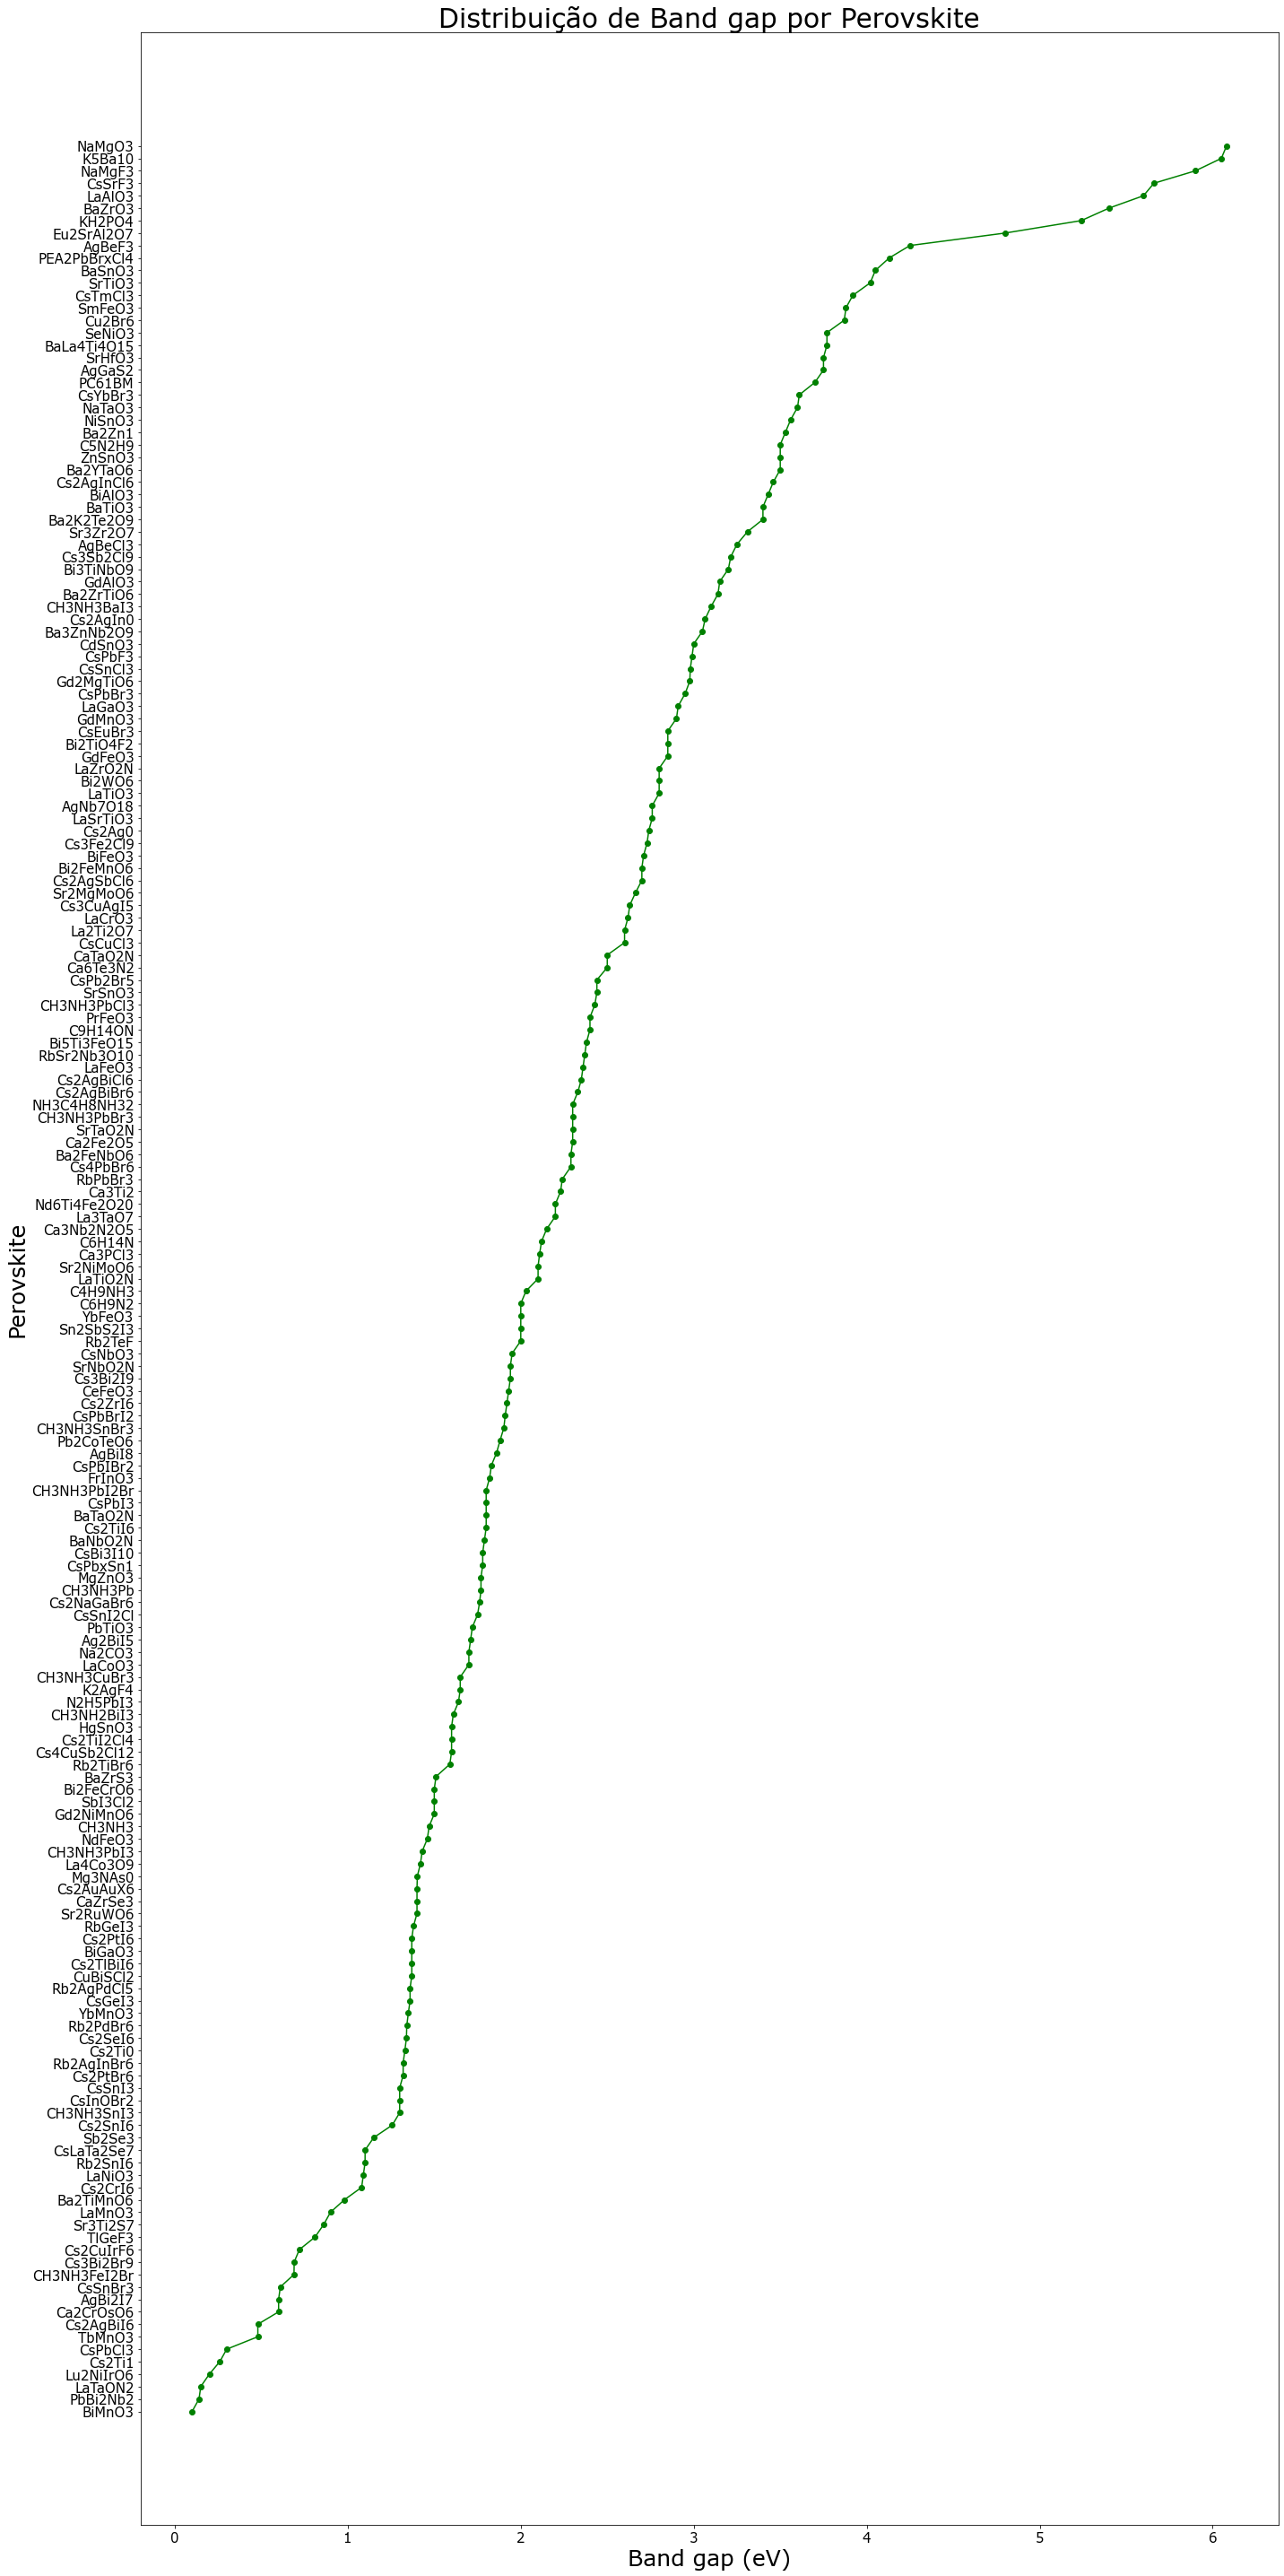

In [19]:
# Conversão de valores para dados float e ordem crescente
df_pbg['Band gap (eV)'] = df_pbg['Band gap (eV)'].astype(float)
df_pbg = df_pbg.sort_values(by='Band gap (eV)')

# Plotagem do gráfico
plt.rcParams['font.family'] = 'Verdana'
plt.figure(figsize=(20, 40))
plt.plot(df_pbg['Band gap (eV)'], df_pbg['Perovskite'], marker='o', color='green')
plt.xlabel('Band gap (eV)', size=25)
plt.ylabel('Perovskite', size=25)
plt.title('Distribuição de Band gap por Perovskite', size=30)
plt.xticks(rotation=0)
plt.tick_params(labelsize=15)
plt.rcParams['legend.fontsize'] = 15
#plt.grid()
#plt.legent()
plt.tight_layout()
plt.show()
#plt.savefig('...')

média
2.2735464480874317
desvio padrão
1.1646875735653053
mínimo
0.1
máximo
6.08


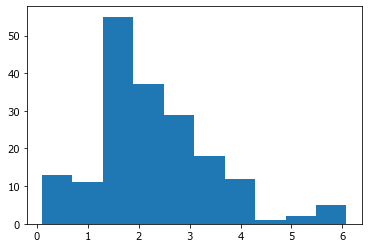

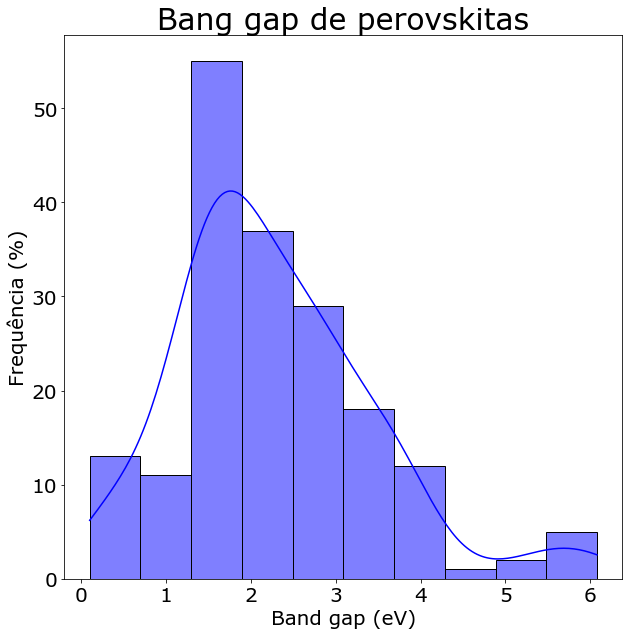

In [20]:
# Configuração do histograma
counts, bins = np.histogram(df_pbg['Band gap (eV)'])
plt.hist(bins[:-1], bins, weights=counts)

# Plotagem do histograma
plt.figure(figsize=(10, 10))
sns.histplot(df_pbg['Band gap (eV)'], kde=True, color='blue', bins=10)  # O argumento 'kde=True' adiciona a curva de densidade
plt.xlabel('Band gap (eV)', size=20)
plt.ylabel('Frequência (%)', size=20)
plt.title('Bang gap de perovskitas', size=30)
plt.tick_params(labelsize=20)
plt.savefig('Histogram perovskite band gap', dpi=300)

# Estatística
print("média")
print(np.mean(df_pbg['Band gap (eV)']))
print("desvio padrão")
print(np.std(df_pbg['Band gap (eV)']))
print("mínimo")
print(np.min(df_pbg['Band gap (eV)']))
print("máximo")
print(np.max(df_pbg['Band gap (eV)']))

In [21]:
# Dicionário para armazenar a contagem de cada palavra
contagem_palavras = defaultdict(int)

# Iterar sobre cada abstract em df_perovskite['Abstract']
for abstract in df_perovskite['Abstract']:
    # Criar um conjunto de palavras únicas no abstract para contar apenas uma vez por abstract
    palavras_abstract = set(abstract.split())
    
    # Iterar sobre cada palavra em df_pbg['Perovskite']
    for palavra in df_pbg['Perovskite']:
        # Verificar se a palavra está presente no abstract
        if palavra in palavras_abstract:
            # Incrementar a contagem da palavra
            contagem_palavras[palavra] += 1
            
palavras = list(contagem_palavras.keys())
print(contagem_palavras)
print()
print(palavras)

defaultdict(<class 'int'>, {'Cs2AgBiI6': 5, 'Rb2PdBr6': 3, 'SrHfO3': 8, 'CH3NH3PbI3': 190, 'Cs2SeI6': 2, 'CsPbI3': 111, 'CH3NH3PbBr3': 34, 'Cs2AgInCl6': 15, 'Cs3Bi2I9': 19, 'CH3NH3SnI3': 23, 'CsPbCl3': 30, 'SrTiO3': 108, 'N2H5PbI3': 1, 'BaTiO3': 64, 'CsBi3I10': 5, 'Cs2AgBiCl6': 11, 'AgBi2I7': 2, 'Cs2TlBiI6': 2, 'Ba2FeNbO6': 1, 'Cs2AgBiBr6': 51, 'La2Ti2O7': 17, 'LaTiO3': 7, 'BaSnO3': 39, 'CH3NH3CuBr3': 1, 'CsPbBr3': 165, 'BaZrS3': 16, 'BaZrO3': 19, 'LaTiO2N': 5, 'SrSnO3': 18, 'NaTaO3': 14, 'CsSnBr3': 14, 'Rb2SnI6': 2, 'Cs2SnI6': 20, 'Cs4CuSb2Cl12': 6, 'CH3NH3': 10, 'BiFeO3': 93, 'CdSnO3': 2, 'CsLaTa2Se7': 1, 'Cs3Bi2Br9': 8, 'Rb2AgPdCl5': 1, 'CsSnI3': 32, 'LaAlO3': 22, 'Ba2ZrTiO6': 1, 'PbTiO3': 26, 'CsGeI3': 9, 'CH3NH2BiI3': 2, 'Sr2MgMoO6': 2, 'LaFeO3': 44, 'LaCoO3': 15, 'NdFeO3': 6, 'Gd2NiMnO6': 1, 'Ca3PCl3': 1, 'CsPbBrI2': 3, 'CsNbO3': 2, 'Cs2NaGaBr6': 3, 'LaCrO3': 3, 'LaTaON2': 5, 'Cs3CuAgI5': 1, 'BiGaO3': 2, 'Bi2FeCrO6': 5, 'CsSnCl3': 5, 'BiMnO3': 3, 'Cs2AgSbCl6': 4, 'Ba2K2Te2O9': 2,

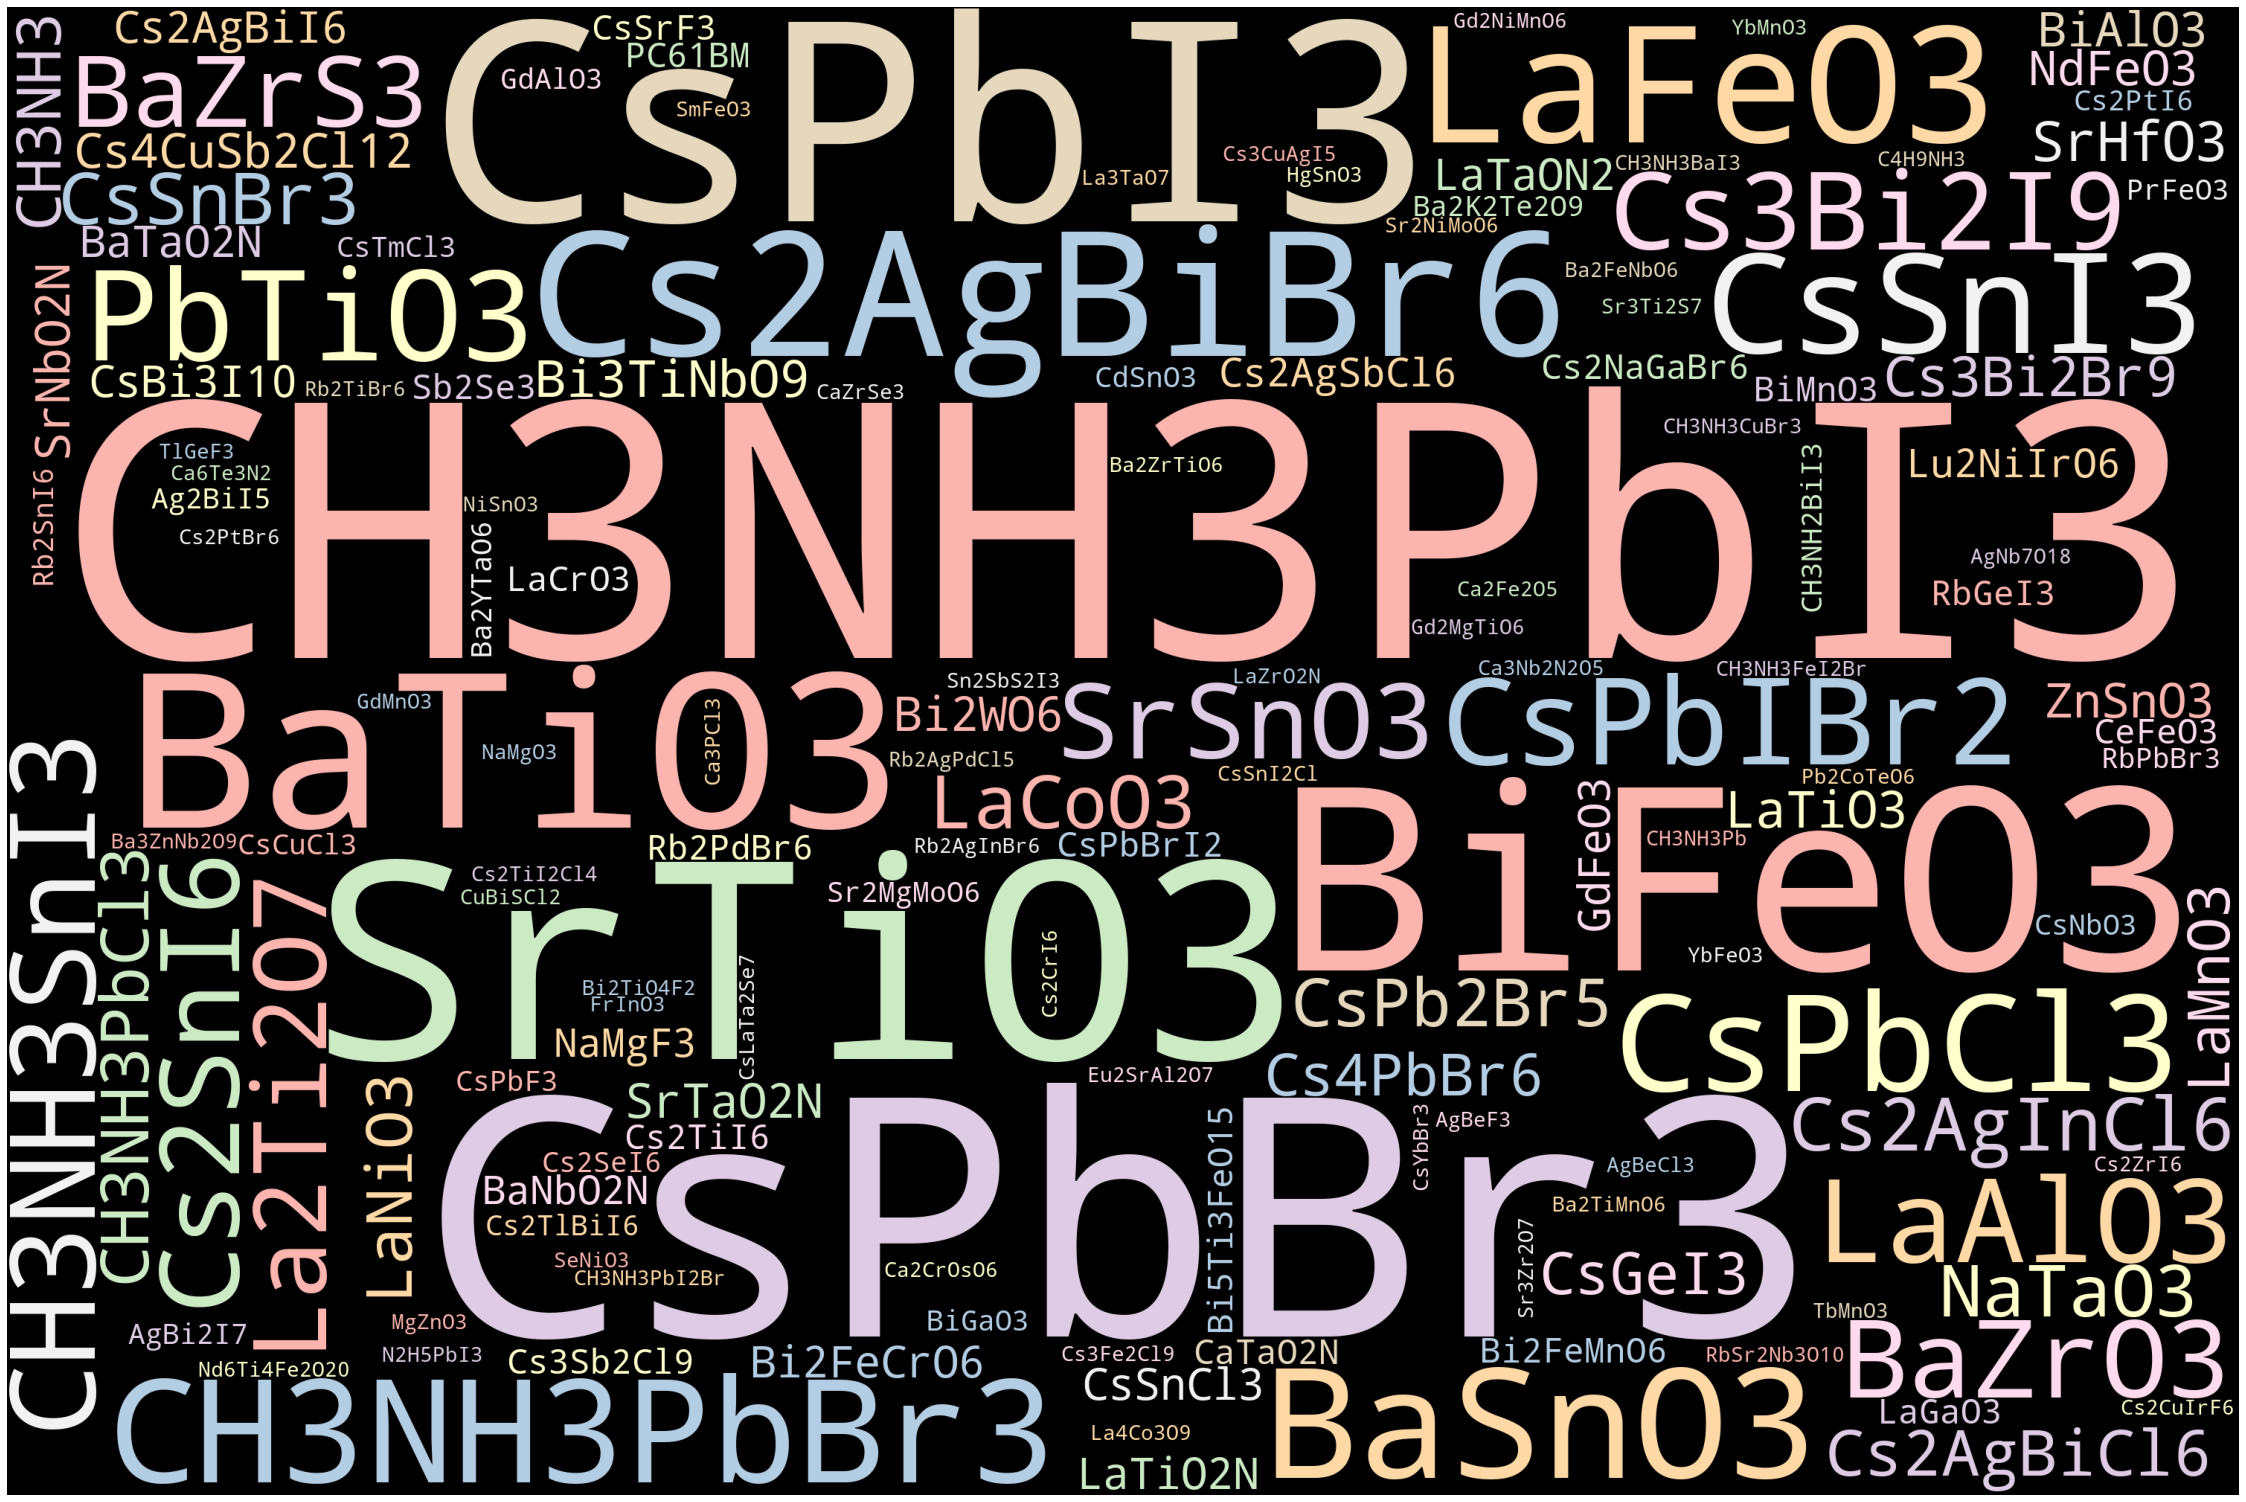

In [22]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))  
    plt.imshow(wordcloud)   
    plt.axis("off")
    
# Configura os parâmetros gráficos do wordcloud (dimensões, cores), gera e salva como imagem
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False).generate_from_frequencies(contagem_palavras)
plot_cloud(wordcloud)
plt.savefig('WORDCLOUD-PCD.png')